# Linear Discriminant Analysis (from scratch) in python

by Anthony Clark

In my previous projects, I walked through how to use Principal Component Analysis to reduce the dimensionality of a dataset down to its principal components while retaining most of the valuable information. PCA is an unsupervised machine learning algorithm, meaning it does not use a labeled dataset (no target variable). I illustrated the inherent difficult of PCA's interpretability due to the fact that it is unsupervised. 

But are there supervised forms of dimensionality reduction that make use of labeled data?

Yes, one of the most popular supervised dimensionality reduction algorithms is known as 

# Linear Discriminant Analysis (LDA)

And it is a type of classification model that uses dimensionality reduction to classify new data points


Similar to PCA, LDA makes use of eigenvectors/eigenvalues. If you are not familiar with the concept of eigenvalues/eigenvectors, check out my project "A6 PCA Part 1" where I go through, in detail, the mathematical basis of eigenvalues/eigenvectors. 

Unlike PCA, LDA makes predictions of a target variable, meaning LDA must be trained and tested.

The objective of LDA is to reduce the dimensinoality or the amount of features in a dataset while retaining all the "important", valuable information. 

What constitutes as "important"? 

Well in PCA we asked the question:

# What is explaining most of the variance (variability, spread, etc.) in the data?

In PCA we wanted to project the data onto the axes that maximizes the cumulative variance/covariance (how variables vary with respect to one another). This is what we considered "important". We had to use raw covariacne because PCA is NOT labeled. There's no classification or regression, it's just unsupervised data.

But because LDA is a classification model, we ask the question

# What explains the most amount of class separation?

In LDA, we want to project the data onto the axes that maximizes class separation (classes are denoted by the target variable). 

Class separation is going to be our guiding light when writing this LDA algorithm from scratch. If we're projecting the data onto different axes, we'll know which axis is the best because it will maximize the amount of class separation.

After all, LDA is a classification model and we ultimately want to use it to make predictions about which class a new, unknown data point falls under. 


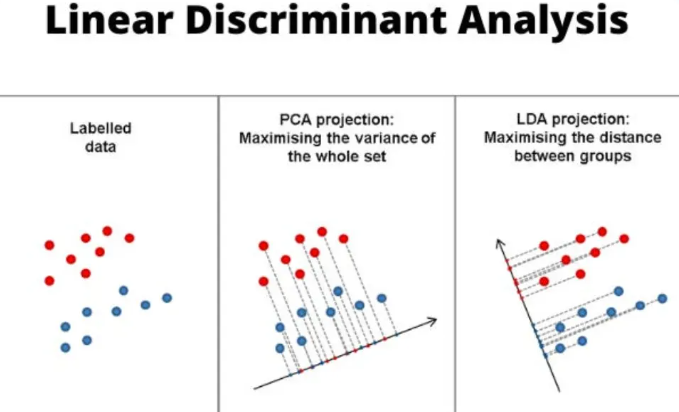


# What are linear discriminants?

That's a good question. Think back to principal component analysis (if you haven't go through my PCA projects first), what were the principal components?

They were the axes that contained the maximum amount of variance in the data. 

Linear discriminants are basically the same thing except they are the axes that contain the maximum amount of class separation or distance between classes. More specifically, the "scatter" between and within classes.

# How many linear discriminants do I want?

Well just like in PCA, this is going to be determined by you and a hyperparameter. We call this hyperparameter "k" and it's just the amount of linear discriminants we want to use to represent the data in lower dimensional space. 

# What kind of equations are going to help us find the maximum class separation?

There are two main matrix equations:

The first is called the

# Between Class Scatter

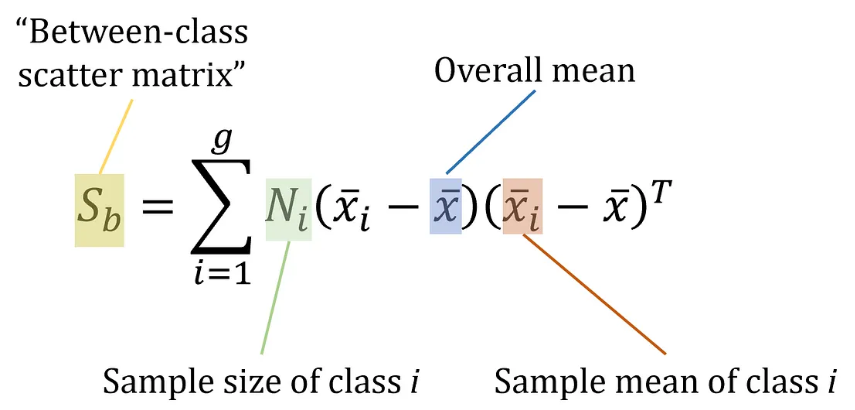

This "scatter matrix" measures the cumulative spread between classes. Remember, we know what data points belong to what class so we can train our algorithm to maxmize this distance.

There's one more "scatter matrix" that we're going to be concerned with and that is the 

# Within Class Scatter

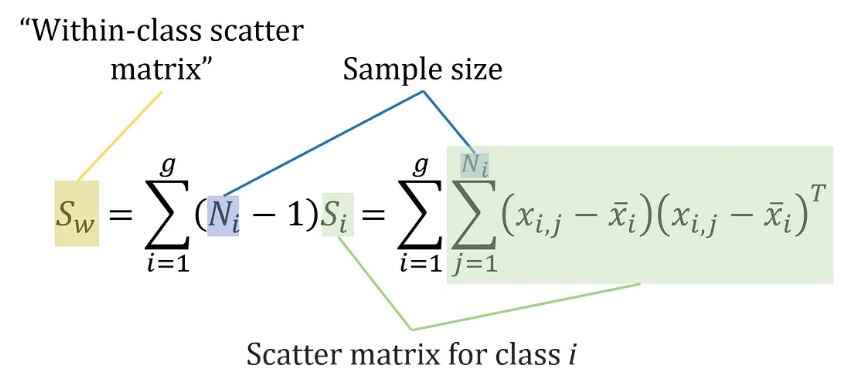

These two scatter matrixes might look complicated, but they are very similar to the covariance matrix that we saw in PCA.

Basically, they both measure two types of "spread" 1) one is how much the data points are spread within the class and 2) how much the data points are spread between classes.

You can then combine the two scatter matrices into one matrix and find the correspoinding eigenvalues/eigenvectors

That's essentially how LDA works

How do you combine the two matrices?

You take the inverse of the within scatter matrix and multiply it with the between scatter matrix.

Once you have the resulting matrix from this matrix multiplication, you can find the corresponding eigenvectors/eigenvalues and these will tell you the direction and magnitude of the axis that maximally separates the two classes

# Within Scatter Matrix^-1 * Between Scatter Matrix

So we're going to call the within scatter matrix:

# Sw

We're going to call the between scatter matrix:

# Sb

And we're going to call the combined matrix

# Sw_inv_Sb

This is what it will look like in the code.


So here are the steps:

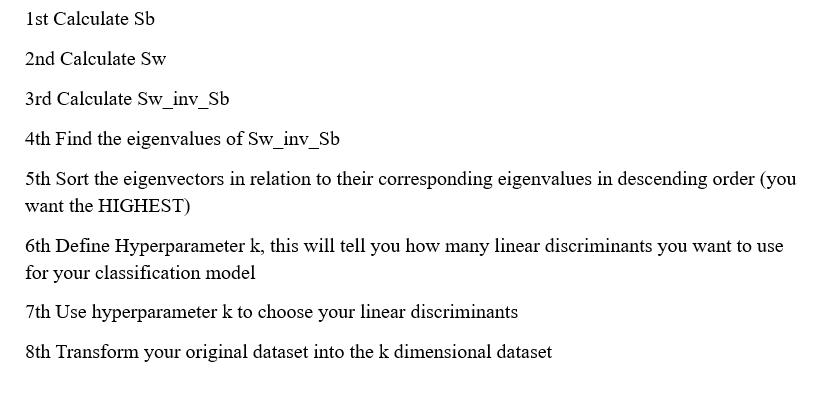

In [116]:
# We're going to need numpy

import numpy as np

#This is the class for LDA
#I'll walk you through each step so we don't get confused

#Define class LDS
class LDA: 
    
    #When you make a class in python always remember two things:
    #1. Double-underscore "__init__" needs to be the first method (technically doesn't "need" to be first, but good convention)
    #2. "self" needs to be the first argument of any method
    
    
    #Start with "dunder" or "magic" method "__init__"
    #We are going to initialize the attributes of the object "LDA"
    
    def __init__(self, n_linear_discriminants):
    #We have one declaration for the initialization method
    #We are establishing how many linear components the object has
    #Remember that this is similar to the amount of components in PCA
        self.n_linear_discriminants = n_linear_discriminants
    
    #Next we have the fit function, which we are going to use to build our model
    #We pass the features "X" and the target variable "y" into the fit method
    def fit(self, X, y):
    
    #We need to know how many features are in the dataset and how many unique classes are composed in the target variable
    
        n_features = X.shape[1] #Number of features can be determined by X.shape[1]
        class_labels = np.unique(y) #We want to count how many unique y, this will give us the amount of classes
        
    #We're now going to calculate the two scatter matrices
    
    #1. Between class scatter matrix Sb
    #2. Within class scatter matrix Sw
    
    #First, calculate the overall mean for all points this is necessary for both equations
        mean_overall = np.mean(X, axis = 0)
        
    #initialize Sw and Sb as zeros
    #What are the dimensions of matrices Sw and Sb?
    #They are both going to be n_features x n_features
    #Look back at their equations if you're confused about this
        
        Sw = np.zeros((n_features, n_features))
        Sb = np.zeros((n_features, n_features))
        
    #Now we'll do the actual calculations using a single for loop
    
        for c in class_labels:

    #Elagant way of grabbing only the feature values corresponding to the correct class
            X_c = X[y == c]
    
    #Caculate class mean by only taking the mean of a particular class
            mean_class = np.mean(X_c, axis = 0)
            
    #The following line of code is a bit confusing
    #If you look at the equation for Sw, it shows that you take a matrix and multiply it by it's tranpose
    #Here we are taking a transpose and multiplying it by its matrix (reverse of the equation)
    #You have to write it in this way or else matrices wont multiply correctly
    
    #It will not broadcast unless you do it this way        
            Sw += (X_c - mean_class).T.dot(X_c - mean_class) #TRANPOSE THE FIRST MATRIX, NOT THE SECOND!
            
            n_c = X_c.shape[0] #Number of values IN THIS CLASS
            
            #Calculate mean difference
            mean_diff = (mean_class - mean_overall).reshape(n_features, 1) #make sure that you reshape
            
            Sb += n_c * (mean_diff).dot(mean_diff.T) #Here you can transpose the second matrix, like the equation
        
        # After the loop we now have Sw and Sb
        #So we're going to calculate Sw_inv_Sb
        #Very simple, can use the np matrix inverse function and the dot product
        Sw_inv_Sb = np.linalg.inv(Sw).dot(Sb)
        
        #Now that we have Sw_inv_Sb, we're almost finished
        
        #We just need to calculate the eigenvalues for this matrix, we did this for PCA
        
        eigenvalues, eigenvectors = np.linalg.eig(Sw_inv_Sb)
        
        #Transpose the eigenvectors, this is because we did the reverse transpose above
        #You need to transpose it back
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1] #Get the index of the highest eigenvalue
        eigenvalues = eigenvalues[idxs] #Only choose those eigenvalues
        eigenvectors = eigenvectors[idxs] #You want the eigenvector of the highest eigenvalue
        #Return "n_linear_discriminants" amount of linear discriminants
        #This is determined by hyperparameter k, which the user inputs
        self.linear_discriminants = eigenvectors[0:self.n_linear_discriminants]
        
    
    def transform(self, X):
        #pass
        
        #This is deceivingly simply
        #All you're doing is multiplying every value by it's corresponding eigenvector to tranform the data
        #This is how the data is projected into lower dimensional space
        #It's very difficult to grasp at first, but it's very elegant
        return np.dot(X, self.linear_discriminants.T)
        
        
    

Now that we've written our class, we need to test it out on some data sets

We will use sklearn to import a dataset, but we wont be using any of sklearn built-in ML algorithms

In [117]:
#Just using sklearn for datasets
from sklearn import datasets

#Also import matplotlib.pyplot for visualizing 

import matplotlib.pyplot as plt

# Let's apply the LDA class to the famous "iris" dataset

Shape of X: (150, 4)
Shape of transformed X: (150, 2)




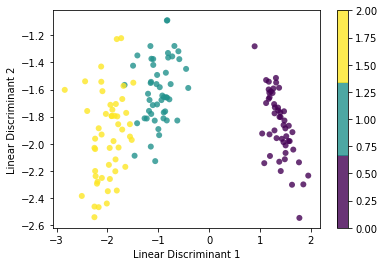

In [118]:
data = datasets.load_iris()

X = data.data
y = data.target

#Project the data onto the 2 primary linear discriminants

#set k 

k = 2

lda = LDA(k)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)
print("\n")

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

Looks pretty good

# Let's try it on the "wine" dataset

Shape of X: (178, 13)
Shape of transformed X: (178, 2)




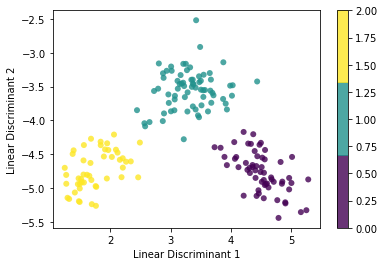

In [119]:
data = datasets.load_wine()

X = data.data
y = data.target

#Project the data onto the 2 primary linear discriminants

#set k 

k = 2

lda = LDA(k)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)
print("\n")

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

# Let's apply it to the breast cancer dataset


Note: sometimes LDA returns complex numbers, this has to do with how the eigenvectors/eigenvalues are calculated via numpy functions

If you plot complex numbers via matplotlib, matplotlib will only use real components. You can either ignore the warning messages (it will say "warning you have a complex number") or you can remove complex numbers using the numpy.real() function 

In [120]:
#If you want to use the numpy real() function

#use the following code

#X_projected = np.real(X_projected)

#It's not necessary, but in case you don't want to deal with complex numbers 

Shape of X: (569, 30)
Shape of transformed X: (569, 2)




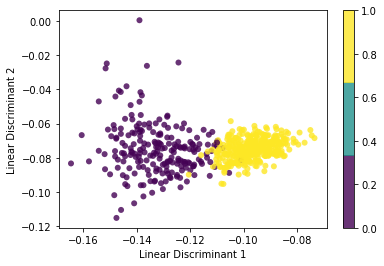

In [121]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target

#Project the data onto the 2 primary linear discriminants

#set k 

k = 2

lda = LDA(k)
lda.fit(X, y)
X_projected = lda.transform(X)

X_projected = np.real(X_projected)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)
print("\n")

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

You can see that the classes still overlap, but these are still the maximally separate classes

What if we try the breast cancer dataset with a higher k?

We wont be able to visualize it the same way, but we might get better separation



Shape of X: (569, 30)
Shape of transformed X: (569, 3)




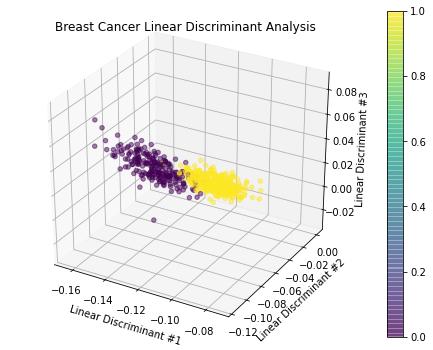

In [122]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target

#Project the data onto the 2 primary linear discriminants

#set k 

k = 3

lda = LDA(k)
lda.fit(X, y)
X_projected = lda.transform(X)
X_projected = np.real(X_projected)
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)
print("\n")

x1, x2, x3 = X_projected[:, 0], X_projected[:, 1], X_projected[:, 2]

# Create the figure and 3D subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x1, x2, x3, c = y, alpha=0.5, cmap='viridis')

# Customize the plot
ax.set_xlabel('Linear Discriminant #1')
ax.set_ylabel('Linear Discriminant #2')
ax.set_zlabel('Linear Discriminant #3')
ax.set_title('Breast Cancer Linear Discriminant Analysis')

# Add a colorbar
fig.colorbar(scatter)

# Show the plot
plt.show()